<a href="https://colab.research.google.com/github/abeer7asan/AI/blob/main/graduate_school_admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(x))

In [4]:
df = pd.read_csv("/content/drive/MyDrive/AI/Exercise /graduate school admissions/binary_model.csv")

In [5]:
print(df)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
..     ...  ...   ...   ...
344      0  520  3.35     3
345      0  500  3.03     3
346      0  600  3.35     2
347      0  580  3.80     2
348      0  400  3.36     2

[349 rows x 4 columns]


In [46]:
# Checking for NULLs in the data
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

array([[<Axes: title={'center': 'admit'}>,
        <Axes: title={'center': 'gre'}>],
       [<Axes: title={'center': 'gpa'}>,
        <Axes: title={'center': 'rank'}>]], dtype=object)

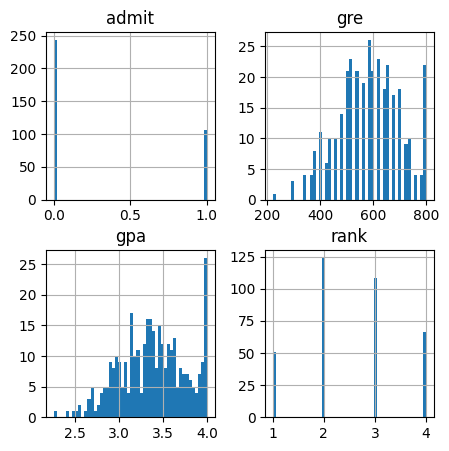

In [6]:
df.hist(bins=50, figsize=(5, 5))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   349 non-null    int64  
 1   gre     349 non-null    int64  
 2   gpa     349 non-null    float64
 3   rank    349 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 11.0 KB


In [8]:
df.describe()

,admit,gre,gpa,rank
count,349.000000,349.000000,349.000000,349.000000
mean,0.303725,584.011461,3.381347,2.541547
std,0.460526,117.668734,0.372611,0.959896
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,500.000000,3.130000,2.000000
50%,0.000000,580.000000,3.380000,2.000000
75%,1.000000,660.000000,3.640000,3.000000
max,1.000000,800.000000,4.000000,4.000000


from matplotlib import pyplot as plt
_df_0['admit'].plot(kind='hist', bins=20, title='admit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['gre'].plot(kind='hist', bins=20, title='gre')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['gpa'].plot(kind='hist', bins=20, title='gpa')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['rank'].plot(kind='hist', bins=20, title='rank')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='admit', y='gre', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='gre', y='gpa', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='gpa', y='rank', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['admit'].plot(kind='line', figsize=(8, 4), title='admit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['gre'].plot(kind='line', figsize=(8, 4), title='gre')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['gpa'].plot(kind='line', figsize=(8, 4), title='gpa')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['rank'].plot(kind='line', figsize=(8, 4), title='rank')
plt.gca().spines[['top', 'right']].set_visible(False)

**Use Inter Quartile Range(IQR) Mwthod to find out outliers**

In [9]:
import matplotlib.pyplot as plt

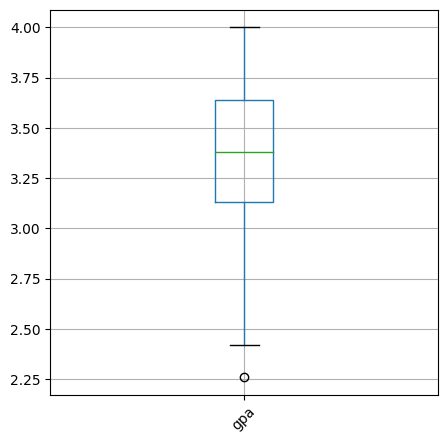

In [15]:
plt.figure(figsize=(5,5))
df[['gpa']].boxplot()
plt.xticks(rotation=45)
plt.show()

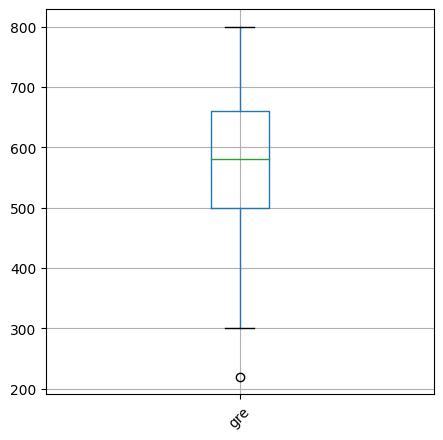

In [16]:
plt.figure(figsize=(5,5))
df[['gre']].boxplot()
plt.xticks(rotation=45)
plt.show()

In [34]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['gre'])
iqr_outliers(df['gpa'])
iqr_outliers(df['admit'])
iqr_outliers(df['rank'])

Outliers: [220]
Outliers: [220, 2.26]
Outliers: [220, 2.26]
Outliers: [220, 2.26]


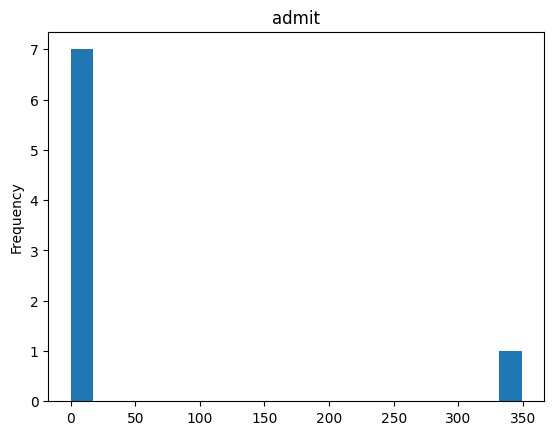

In [19]:
_df_0['admit'].plot(kind='hist', bins=20, title='admit')
plt.gca().spines[['top', 'right',]]

In [21]:
print(df['admit'].value_counts())

admit
0    243
1    106
Name: count, dtype: int64


In [35]:
import plotly.express as px

In [36]:
px.imshow(df.corr(),title="Correlation Plot of each attribute with admition")

In [38]:
# Shows the Distribution of admit with respect to rank (categoral)
fig=px.histogram(df,
                 x="admit",
                 color="rank",
                 hover_data=df.columns,
                 title="Distribution of admit",
                 barmode="group")
fig.show()

In [40]:
fig=px.histogram(df,
                 x="admit",
                 color="admit",
                 hover_data=df.columns,
                 title="admit Ratio in the Data")
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

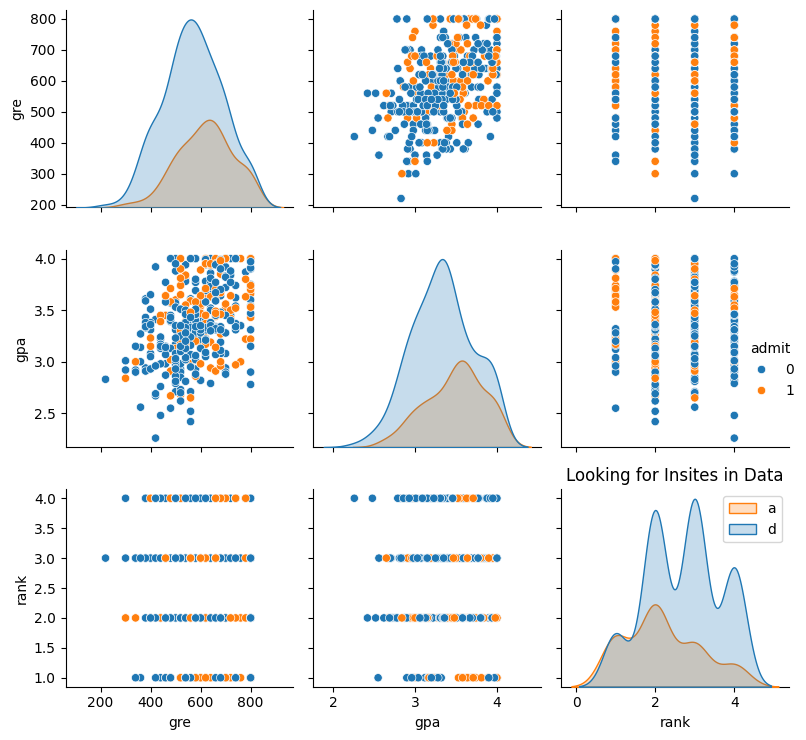

In [44]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="admit")
plt.title("Looking for Insites in Data")
plt.legend("admit")
plt.tight_layout()
plt.plot()

**to check the linearity of the variables , the following  plot the istribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution**

* In linear regression analysis, one of the key assumptions is that there is a linear relationship between the independent variables (features) and the dependent variable (target). If this assumption is violated, the predictions made by the model may be inaccurate.

* Linear relationships often result in better model performance. Non-linear relationships can introduce complexities that may be difficult for linear models to capture effectively.

* linearity of variables can guide feature selection. Non-linear variables may need to be transformed or handled differently to improve model performance.


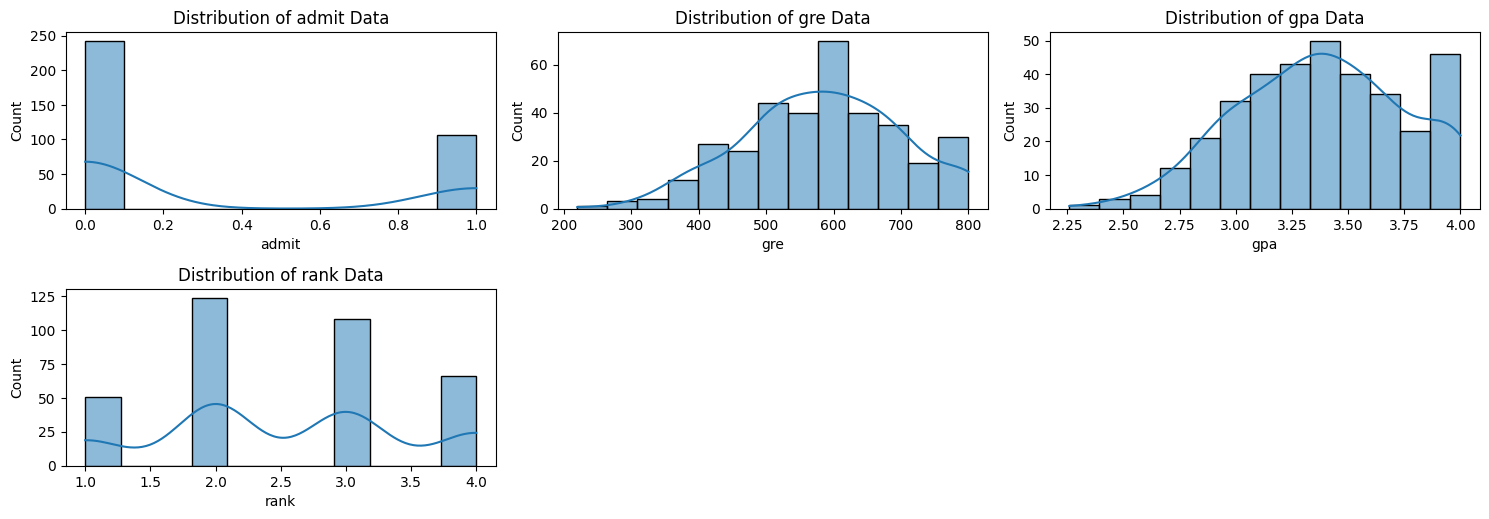

In [45]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

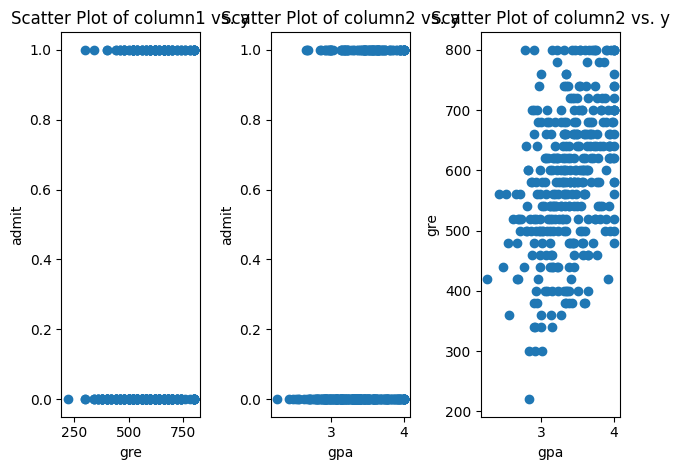

In [53]:
plt.subplot(1, 3, 1)
plt.scatter(df['gre'], df['admit'])
plt.title('Scatter Plot of column1 vs. y')
plt.xlabel('gre')
plt.ylabel('admit')

# Plot scatter plot for the second independent variable
plt.subplot(1, 3, 2)
plt.scatter(df['gpa'], df['admit'])
plt.title('Scatter Plot of column2 vs. y')
plt.xlabel('gpa')
plt.ylabel('admit')

plt.subplot(1, 3, 3)
plt.scatter(df['gpa'], df['gre'])
plt.title('Scatter Plot of column2 vs. y')
plt.xlabel('gpa')
plt.ylabel('gre')

plt.tight_layout()
plt.show()


**Robust Scaler**
When working with **outliers** we can use Robust Scaling for scakling our data, It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. RobustScaler uses the interquartile range so that it is robust to outliers
ref: https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem

In [58]:
from sklearn import preprocessing

In [67]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


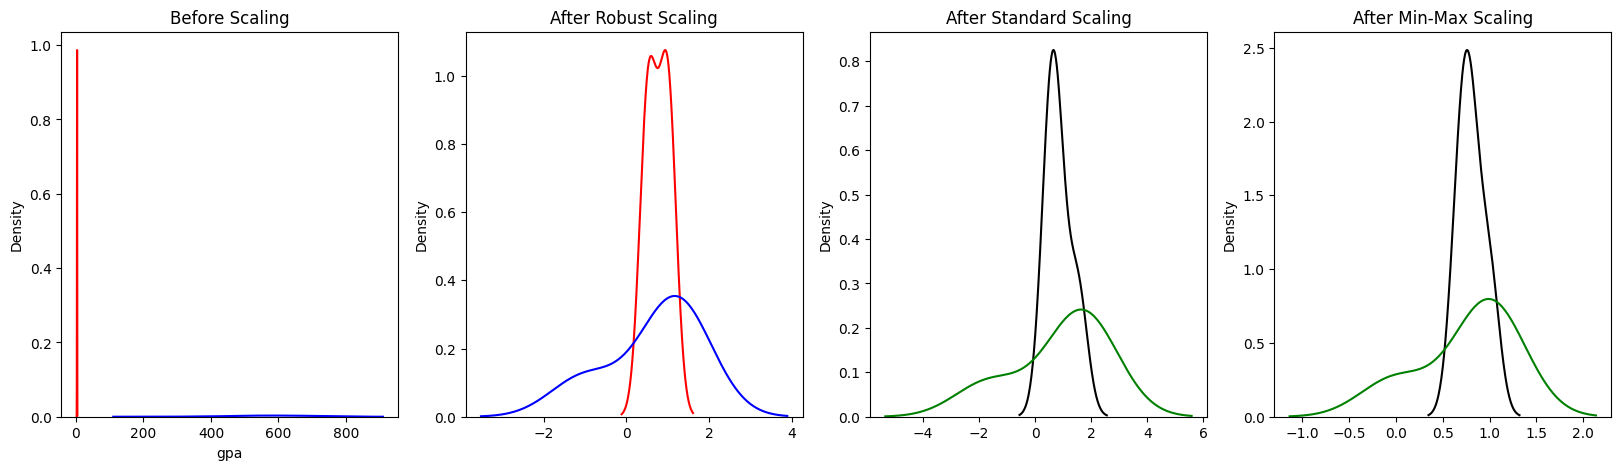

In [73]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df)

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df)

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(df['gpa'], ax = ax1, color ='r')
sns.kdeplot(df['gre'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df[1], ax = ax2, color ='red')
sns.kdeplot(robust_df[2], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df[1], ax = ax3, color ='black')
sns.kdeplot(standard_df[2], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df[1], ax = ax4, color ='black')
sns.kdeplot(minmax_df[2], ax = ax4, color ='g')
plt.show()

In [ ]:
one_hot_encoding = pd.get_dummies(df['rank'], dtype=int)

In [ ]:
print(one_hot_encoding)

     1  2  3  4
0    0  0  1  0
1    0  0  1  0
2    1  0  0  0
3    0  0  0  1
4    0  0  0  1
..  .. .. .. ..
344  0  0  1  0
345  0  0  1  0
346  0  1  0  0
347  0  1  0  0
348  0  1  0  0

[349 rows x 4 columns]


In [ ]:
df_encoded = pd.concat([df, one_hot_encoding], axis=1)

In [ ]:
print(df_encoded)

     admit  gre   gpa  rank  1  2  3  4
0        0  380  3.61     3  0  0  1  0
1        1  660  3.67     3  0  0  1  0
2        1  800  4.00     1  1  0  0  0
3        1  640  3.19     4  0  0  0  1
4        0  520  2.93     4  0  0  0  1
..     ...  ...   ...   ... .. .. .. ..
344      0  520  3.35     3  0  0  1  0
345      0  500  3.03     3  0  0  1  0
346      0  600  3.35     2  0  1  0  0
347      0  580  3.80     2  0  1  0  0
348      0  400  3.36     2  0  1  0  0

[349 rows x 8 columns]


In [ ]:
df_encoded.drop(columns=['rank'], inplace=True)

In [ ]:
print(df_encoded)

     admit  gre   gpa  1  2  3  4
0        0  380  3.61  0  0  1  0
1        1  660  3.67  0  0  1  0
2        1  800  4.00  1  0  0  0
3        1  640  3.19  0  0  0  1
4        0  520  2.93  0  0  0  1
..     ...  ...   ... .. .. .. ..
344      0  520  3.35  0  0  1  0
345      0  500  3.03  0  0  1  0
346      0  600  3.35  0  1  0  0
347      0  580  3.80  0  1  0  0
348      0  400  3.36  0  1  0  0

[349 rows x 7 columns]


In [ ]:
df_encoded = df_encoded.rename(columns={1:'rank_1', 2:'rank_2',3:'rank_3', 4:'rank_4'})

In [ ]:
print(df_encoded)

     admit  gre   gpa  rank_1  rank_2  rank_3  rank_4
0        0  380  3.61       0       0       1       0
1        1  660  3.67       0       0       1       0
2        1  800  4.00       1       0       0       0
3        1  640  3.19       0       0       0       1
4        0  520  2.93       0       0       0       1
..     ...  ...   ...     ...     ...     ...     ...
344      0  520  3.35       0       0       1       0
345      0  500  3.03       0       0       1       0
346      0  600  3.35       0       1       0       0
347      0  580  3.80       0       1       0       0
348      0  400  3.36       0       1       0       0

[349 rows x 7 columns]


In [ ]:
X = df_encoded.drop('admit', axis=1)

In [ ]:
print(X)

     gre   gpa  rank_1  rank_2  rank_3  rank_4
0    380  3.61       0       0       1       0
1    660  3.67       0       0       1       0
2    800  4.00       1       0       0       0
3    640  3.19       0       0       0       1
4    520  2.93       0       0       0       1
..   ...   ...     ...     ...     ...     ...
344  520  3.35       0       0       1       0
345  500  3.03       0       0       1       0
346  600  3.35       0       1       0       0
347  580  3.80       0       1       0       0
348  400  3.36       0       1       0       0

[349 rows x 6 columns]


In [ ]:
y = df_encoded['admit']

In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
344    0
345    0
346    0
347    0
348    0
Name: admit, Length: 349, dtype: int64


split the data to test and train data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (279, 6)
X_test.shape: (70, 6)
y_train.shape: (279,)
y_test.shape: (70,)


In [ ]:
# initialize the scaler
scaler = StandardScaler()

# apply to test and train data
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)



In [ ]:
print(X_train_scaler)

[[-0.93009031  0.10522676 -0.42685289  1.31730563 -0.65074526 -0.47295265]
 [-0.39870083 -0.76819574  2.34272749 -0.75912528 -0.65074526 -0.47295265]
 [ 1.01833778  1.23222354 -0.42685289  1.31730563 -0.65074526 -0.47295265]
 ...
 [ 1.01833778  0.47150071  2.34272749 -0.75912528 -0.65074526 -0.47295265]
 [ 0.4869483   1.57032257 -0.42685289  1.31730563 -0.65074526 -0.47295265]
 [-1.81573944 -0.17652243 -0.42685289 -0.75912528 -0.65074526  2.11437656]]


In [ ]:
print(X_test_scaler)

[[-0.74535599  0.56570684  2.78388218 -0.6770032  -0.74535599 -0.52223297]
 [-0.1490712  -1.59299862 -0.3592106  -0.6770032   1.34164079 -0.52223297]
 [-2.08699678 -1.15197277 -0.3592106   1.47709789 -0.74535599 -0.52223297]
 [ 1.63978318  0.4496474   2.78388218 -0.6770032  -0.74535599 -0.52223297]
 [ 0.         -1.105549   -0.3592106  -0.6770032  -0.74535599  1.91485422]
 [-0.4472136  -0.50203995 -0.3592106   1.47709789 -0.74535599 -0.52223297]
 [-2.68328157 -1.17518466 -0.3592106  -0.6770032   1.34164079 -0.52223297]
 [-0.2981424  -0.73415881 -0.3592106  -0.6770032  -0.74535599  1.91485422]
 [ 0.74535599 -0.78058259 -0.3592106  -0.6770032  -0.74535599  1.91485422]
 [ 1.63978318  0.61213061 -0.3592106   1.47709789 -0.74535599 -0.52223297]
 [ 1.04349839  1.54060608 -0.3592106  -0.6770032   1.34164079 -0.52223297]
 [ 1.04349839  1.26206344 -0.3592106  -0.6770032   1.34164079 -0.52223297]
 [-0.59628479  1.54060608 -0.3592106  -0.6770032   1.34164079 -0.52223297]
 [ 0.1490712   0.47285929

Initialize the ANN model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

The model expects rows of data with 6 variables (the input_shape=(6,) argument).
The first hidden layer has 12 nodes and uses the relu activation function.
The second hidden layer has 8 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(6,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train The Model**

In [ ]:
model.fit(X_train_scaler, y_train, epochs=100, batch_size=10)

Epoch 1/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5119 - accuracy: 0.7563
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7563
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7563
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7563
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.7527
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7599
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7563
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7563
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7599
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7563
Epoch 11/

**Evaluate The Model**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaler, y_test)
print('Accuracy: %.2f' % (accuracy*100))

3/3 [==============================] - 0s 7ms/step - loss: 0.7119 - accuracy: 0.6571
Accuracy: 65.71


**Predictions**
1. prepare the data for predection
2. apply hot coding
3. apply scale
4. predict

**SVM**

SVM allows for more accurate machine learning because it’s multidimensional.

We need to choose the best Kernel according to our need.

The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
Polynomial kernels give good results for problems where all the training data is normalized.